# Homework 3

Andrew Glisson - 3767583

Due 03/18/2020


## Problem 1

Implement the function ```get_random_data(w, b, mu, sigma, m)``` that generates random data for logisitic regression with two features features ```x_1``` and ```x_2```. This function should return the array ```data``` of shape ```(m, 2)``` and the array ```labels``` of shape ```(m, 1)```.

The entries of the arrays should be generated as follows.  For each row ```i in {0, 1, ..., m-1}```:

- Choose class label ```c=0``` with probability 1/2 and ```c=1``` with probability 1/2.  
- Choose the first feature ```x_1``` uniformly at random in the interval ```[0, 1)```. 
- Set the second feature ```x_2``` to be ```x_2 = w * x_1 + b + (-1)^c * n```, where the "noise" ```n``` is chosen according to the normal distribution with mean ```mu``` and standard deviation ```sigma```.
- The ith row of the array ```data``` consists of the features ```x_1``` and ```x_2```.
- The ith entry of the vector ```labels``` is the class label ```c```.

In [0]:
import numpy as np
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
## sigmoid function needed by multiple cells
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

In [0]:
np.random.seed(999)
w = 20
b = 10
m = 10000
mu = 20
sigma = 6

def get_random_data(w, b, mu, sigma, m):

  global data
  global label

  data = np.empty((m, 2)) 
  label = np.empty(m)

  i = 0
  n = 0
  while i < m :
    c = random.randint(0,1)

    x_1 = np.random.uniform()

    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + ((-1)**c) * n

    data[i] = [x_1, x_2]
    label[i]= c

    i = i + 1


get_random_data(w, b, mu, sigma, m)

Implement the function ```display_random_data``` that takes as input the above two arrays ```labels``` and ```data```. It should create scatter plot of the 2D points stored in ```data```. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0. 

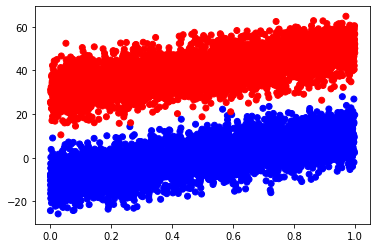

In [0]:
def display_random_data(label, data): 

  colors = ['blue' if label[x] == 1 else 'red' for x in range(len(label))]

  plt.scatter(data[:,0], data[:,1], c=colors)
  plt.show()

display_random_data(label, data)

In [0]:
## Splitting the data/labesl into training set (80%) and test set (20%)

train_data = data[:8000]
train_label = label[:8000]

test_data = data[8000:]
test_label = label[8000:]

## Problem 2

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
def build_model():
  
  model = models.Sequential()
  model.add(layers.Dense(1, activation='sigmoid', input_dim=2))

  model.compile(optimizer='sgd', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
  
  return model

In [0]:
model = build_model()

model.fit(train_data, 
          train_label, 
          epochs=300, 
          batch_size=32, 
          validation_data=(test_data, test_label))

Epoch 1/300
250/250 [==============================] - 0s 2ms/step - loss: 0.7876 - accuracy: 0.6935 - val_loss: 0.3637 - val_accuracy: 0.7925
Epoch 2/300
250/250 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8380 - val_loss: 0.2525 - val_accuracy: 0.8845
Epoch 3/300
250/250 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9153 - val_loss: 0.1920 - val_accuracy: 0.9345
Epoch 4/300
250/250 [==============================] - 0s 1ms/step - loss: 0.1829 - accuracy: 0.9486 - val_loss: 0.1546 - val_accuracy: 0.9580
Epoch 5/300
250/250 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9650 - val_loss: 0.1299 - val_accuracy: 0.9670
Epoch 6/300
250/250 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9745 - val_loss: 0.1121 - val_accuracy: 0.9855
Epoch 7/300
250/250 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9804 - val_loss: 0.0988 - val_accuracy: 0.9875

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. 


To get the seperating line I use the equation $0 = w_1 x_1 + w_2 x_2 + b$, and I solve for $x_2$ when the sigmoid function, $\frac{1}{1+e^{-z}}$ equals 1/2. I used the equation $x_2 = (w_1 x_1 + b) / w_2 $ for the predicted line.

Weights:
[[ 4.332315  ]
 [-0.40680543]]
Bias: 
[5.722747]


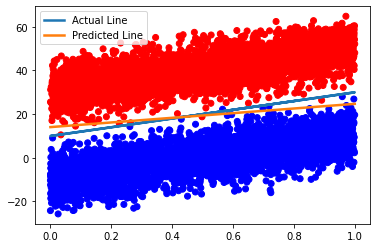

In [0]:
## get the weights from the model 
weights = model.get_weights()
print("Weights:")
print(weights[0])
print("Bias: ")
print(weights[1])

## create the seperating line from the trained weights
d = np.linspace(0,1)
sep_line = (-(weights[0][0] * d + weights[1])) / weights[0][1]

## plot data and seperating line 
colors = ['blue' if train_label[x] == 1 else 'red' for x in range(len(train_label))]
plt.plot(train_data[:,0], w * train_data[:,0] + b, label = 'Actual Line', linewidth = 2.5 )
plt.scatter(train_data[:,0], train_data[:,1], c=colors)
plt.plot(d, sep_line, label='Predicted Line', linewidth = 2.5)
plt.legend()
plt.show()

Using a heatmap to visualize the training model.

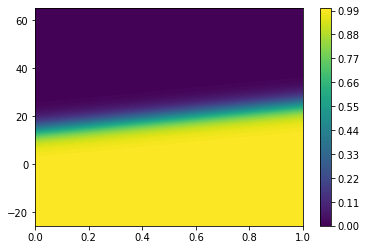

In [0]:
w1 = weights[0][0]
w2 = weights[0][1]
b = weights[1]

y_min = min(train_data[:,1])
y_max = max(train_data[:,1])

x = np.linspace(0, 1, 100)
y = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)

z = sigmoid(w1 * x + w2 * y + b)

plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.show()

## Problem 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

In [0]:
## computing the gradient descent for the weights and bias
def gradientDescent(a, x, y, weights, bias, lr):
  for i in range(len(weights)):
    weights[i] = weights[i] - (lr * (( a - y ) * x[i]))
  
  bias = bias - ((a - y) * lr)
  return weights, bias

class NpLogReg:

  def start(self):
    self.lr = .01
    self.epochs = 300
    self.weights = np.random.rand(2)
    self.bias = np.random.rand(1)

  def fit(self, train_data, train_label):
    for i in range(self.epochs):
      for j in range(len(train_data)):
        a = sigmoid(np.dot(self.weights.T, train_data[j]) + self.bias)

        self.weights, self.bias = gradientDescent(a, train_data[j], train_label[j], self.weights, self.bias, self.lr)
      if i == 1: print("Loading Model...")
    print("Done!")

  def plot_line(self, train_data, train_label):
    d = np.linspace(0, 1)

    colors = ['blue' if train_label[x] == 1 else 'red' for x in range(len(train_label))]

    pred_line = (-((self.weights[0] * d) + self.bias)) / self.weights[1]
    plt.plot(train_data[:,0], w * train_data[:,0] + b, label = 'Actual Line', linewidth = 2.5 )
    plt.plot(d, pred_line, label='Predicted Line', linewidth = 2.5)
    plt.legend()
    plt.scatter(train_data[:,0], train_data[:,1], c=colors)

In [0]:
np_model = NpLogReg()
np_model.start()

In [151]:
np_model.fit(train_data, train_label)

Loading Model...
Done!


Plotting the random data, the true line used to generate the data, and the separating line of the trained model.

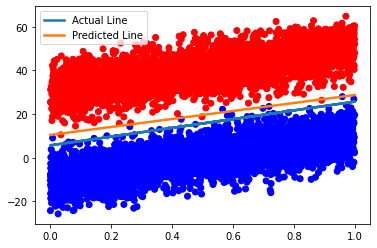

In [152]:
np_model.plot_line(train_data, train_label)

Use a heatmap to visualize the function defined by your trained model. 


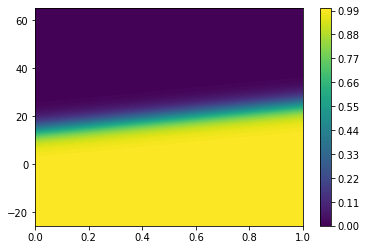

In [153]:
w1 = np_model.weights[0]
w2 = np_model.weights[1]
b = np_model.bias

y_min = min(train_data[:,1])
y_max = max(train_data[:,1])

x = np.linspace(0, 1, 100)
y = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x, y)

z = sigmoid(w1 * x + w2 * y + b)

plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.show()